# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [65]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [66]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [67]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [68]:
model = torch.nn.Linear(28*28, 10)

In [69]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.5762,  0.2089, -0.3127, -0.2236, -0.0168, -0.2874,  0.1680,  0.8132,
          0.2152,  0.0305]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [70]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [71]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [72]:
print('Final loss:', loss.data)

Final loss: tensor(0.3135)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

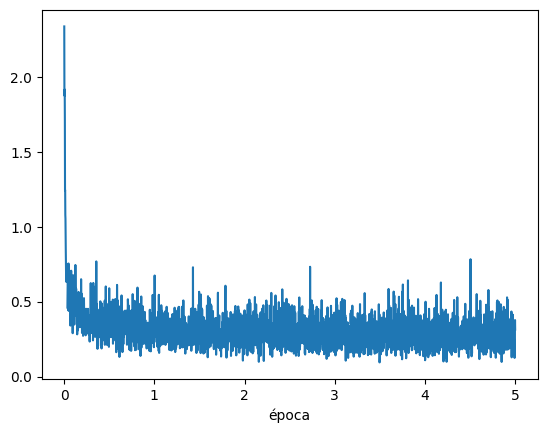

In [73]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

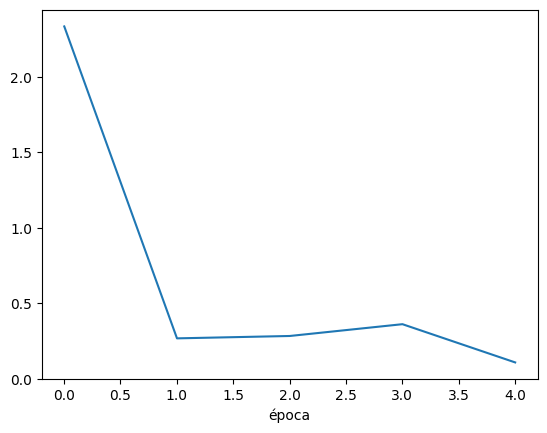

In [74]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch? **Resposta**:100
2. Em uma época, quantos mini-batches existem? **Resposta**:600
3. Qual é a definição de época? **Resposta**: É o valor correspondente a quantidade de vezes que o laço de treinamento será executado.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
    

In [30]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

    # verbose
    print('Epoch[{}/{}], Batch: {:}'.format(i+1, n_epochs, len(loader_train)))

Epoch[1/5], Batch: 600
Epoch[2/5], Batch: 600
Epoch[3/5], Batch: 600
Epoch[4/5], Batch: 600
Epoch[5/5], Batch: 600


2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [55]:
# dataset_dir = 'MNIST/'

# dataset_train = MNIST(dataset_dir, train=True, download=True,
#                         transform=torchvision.transforms.ToTensor())

In [75]:
def loader(bs):
  """
  Função que retorna o loader_train
  """
  loader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)

  print('Número de minibatches de trenamento:', len(loader_train))

  x_train, y_train = next(iter(loader_train))
  n_batches_train = len(loader_train)
  total_samples = dataset_train.train_data.size(0)

  return loader_train, x_train, y_train, n_batches_train, total_samples

In [80]:
def treinamento(loader_train, x_train, y_train, n_batches_train, total_samples):
  """
  Função que retorna a época e as perdas
  """
  # treinamento
  epochs = []
  losses = []

  total_trained_samples = 0
  for i in range(n_epochs):
      for k,(x_train, y_train) in enumerate(loader_train):
          # Transforma a entrada para uma dimensão
          inputs = Variable(x_train.view(-1, 28 * 28))
          # predict da rede
          outputs = model(inputs)

          # calcula a perda
          loss = criterion(outputs, Variable(y_train))

          # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_trained_samples += x_train.size(0)
          epochs.append(total_trained_samples / total_samples)
          losses.append(loss.data)

  print(f"Perda Final - {loss.data}")
  return epochs, losses

In [81]:
def grafico_perda(epochs,n_batches_train,losses):
  """
  Função que retorna o gráfico da perda para a última época
  """
  plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
  plt.xlabel('época')
  plt.title(f"Cálculo de perda para o batch_size {n_batches_train}")
  plt.show()

Número de minibatches de trenamento: 120

Dimensões dos dados de um minibatch: torch.Size([500, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>
Perda Final - 0.29317042231559753


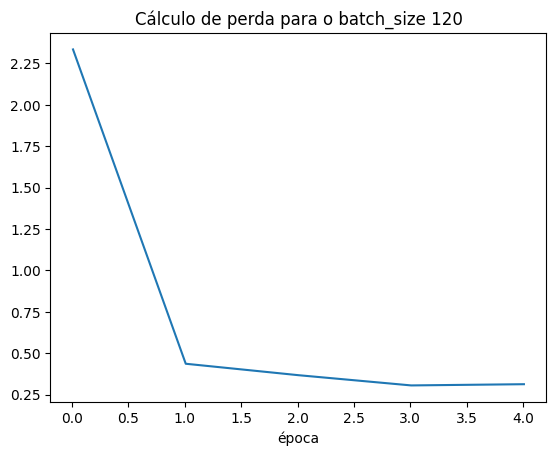

Número de minibatches de trenamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>
Perda Final - 0.32489684224128723


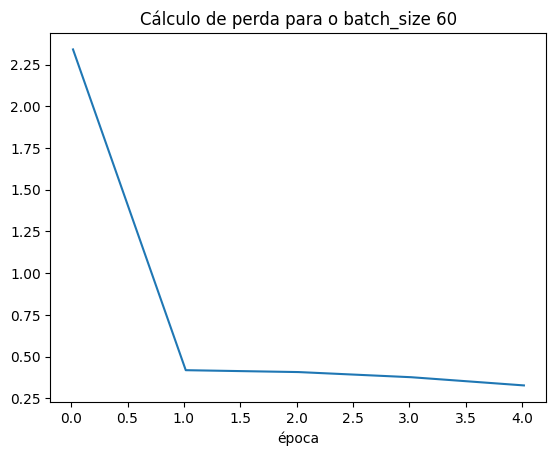

In [82]:
batches = [500,1000]

for v in batches:
  # criação do modelo
  model = torch.nn.Linear(28*28, 10)

  # definição dos parâmetros

  n_epochs = 5
  learningRate = 0.5

  # Utilizaremos CrossEntropyLoss como função de perda
  criterion = torch.nn.CrossEntropyLoss()

  # Gradiente descendente
  optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

  loader_train, x_train, y_train, n_batches_train, total_samples = loader(v)
  print("\nDimensões dos dados de um minibatch:", x_train.size())
  print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
  print("Tipo dos dados das imagens:         ", type(x_train))
  print("Tipo das classes das imagens:       ", type(y_train))

  ep, l = treinamento(loader_train, x_train, y_train, n_batches_train, total_samples)

  grafico_perda(ep,n_batches_train,l)

  del ep, l, loader_train, x_train, y_train, n_batches_train, total_samples

Resultado:
É possível observar que para o batch_size de 100 tivemos um valor de perda final maior do que para os batch_size de 500 e 1000. Entre os dois últimos tamanhos, o valor de 1000 teve o melhor resultado visualmente pois quando decai para 1 ele apresenta uma inclinação mais suave do que o valor de batch_size de 500.

## Conclusões sobre os experimentos deste notebook


Neste notebook foi possível implementar o Dataset e Dataloader com diferentes configurações de tamanho do batch_size. Com isto, observamos como a perda diminuiu a medida que aumentamos o valor de batch_size.

* A medida que aumentamos o valor de batch_size, a quantidade de amostras para o treinamento aumenta mas o número das amostras para atualização dos pesos diminui (mini_batch).